In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import datetime
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from statistics import mean, median, mode, stdev

1.DATASET IMPORT

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [ ]:
#city_day = "https://drive.google.com/file/d/1TugcD3ieiT_dOqlikVvSDJLWKkG9VH7n/view?usp=sharing"

In [ ]:
airqualitydataset=pd.read_csv("city_day.csv")
print(airqualitydataset)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [ ]:
airqualitydataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


2.EXPLORATORY DATA ANALYSIS

In [ ]:
airqualitydataset.drop('NOx', inplace=True, axis=1)

In [ ]:
airqualitydataset.drop('NH3', inplace=True, axis=1)
#droping off the irrelevant columns

In [ ]:
airqualitydataset.drop('Date',inplace=True,axis=1)

In [ ]:
airqualitydataset.drop(['Toluene','Xylene','SO2'],axis=1,inplace=True)

In [ ]:
airqualitydataset.head()

,City,PM2.5,PM10,NO,NO2,CO,O3,Benzene,AQI,AQI_Bucket
0,Ahmedabad,NaN,NaN,0.92,18.22,0.92,133.36,0.00,NaN,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,0.97,34.06,3.68,NaN,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,17.40,30.70,6.80,NaN,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,1.70,36.08,4.43,NaN,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,22.10,39.31,7.01,NaN,NaN


In [ ]:
airqualitydataset.shape

(29531, 10)

In [ ]:
new_dataset=airqualitydataset.dropna()
#dropping the rows with null values

In [ ]:
new_dataset.reset_index(drop=True, inplace=True)
#reseting the index

In [ ]:
new_dataset.head()

,City,PM2.5,PM10,NO,NO2,CO,O3,Benzene,AQI,AQI_Bucket
0,Ahmedabad,37.55,122.41,15.08,85.12,15.08,48.23,16.44,281.0,Poor
1,Ahmedabad,33.97,116.32,14.67,79.71,14.67,51.86,15.55,330.0,Very Poor
2,Ahmedabad,35.48,130.07,18.02,77.61,18.02,38.99,15.88,356.0,Very Poor
3,Ahmedabad,34.11,138.31,13.27,75.23,13.27,42.22,15.93,359.0,Very Poor
4,Ahmedabad,33.69,111.73,34.56,68.90,34.56,36.95,15.53,547.0,Severe


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        14271 non-null  object 
 1   PM2.5       14271 non-null  float64
 2   PM10        14271 non-null  float64
 3   NO          14271 non-null  float64
 4   NO2         14271 non-null  float64
 5   CO          14271 non-null  float64
 6   O3          14271 non-null  float64
 7   Benzene     14271 non-null  float64
 8   AQI         14271 non-null  float64
 9   AQI_Bucket  14271 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
new_dataset.describe()

,PM2.5,PM10,NO,NO2,CO,O3,Benzene,AQI
count,14271.000000,14271.000000,14271.000000,14271.000000,14271.000000,14271.000000,14271.000000,14271.000000
mean,59.755744,122.656994,18.813925,30.966117,1.470138,35.295468,3.803442,146.284563
std,53.012419,89.411429,22.729746,23.336551,3.858657,21.339169,18.541462,107.755233
min,0.990000,0.210000,0.030000,0.030000,0.000000,0.010000,0.000000,14.000000
25%,26.750000,61.250000,5.820000,14.475000,0.540000,20.155000,0.360000,77.000000
50%,44.850000,100.230000,11.080000,26.080000,0.820000,32.010000,1.550000,110.000000
75%,72.370000,154.005000,21.965000,40.935000,1.240000,45.890000,3.610000,174.000000
max,685.360000,847.410000,246.660000,292.020000,119.300000,257.730000,455.030000,1595.000000


In [ ]:
median(new_dataset['PM2.5'])

44.85

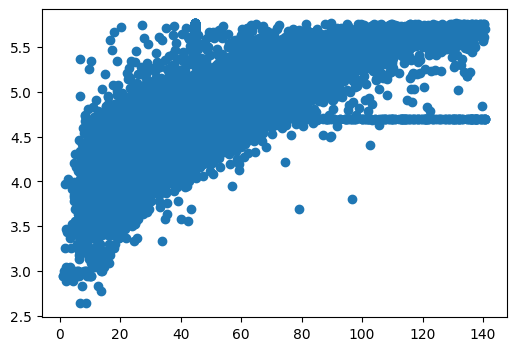

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(new_dataset['PM2.5'],new_dataset['AQI'])

2.1 OUTLIERS DETECTION

In [ ]:
Q1 = new_dataset['PM2.5'].quantile(0.25)
Q3 = new_dataset['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
median_value = new_dataset["PM2.5"].median()
new_dataset.loc[(new_dataset["PM2.5"] > upper) | (new_dataset['PM2.5'] < lower), "PM2.5"] = median_value

<Axes: >

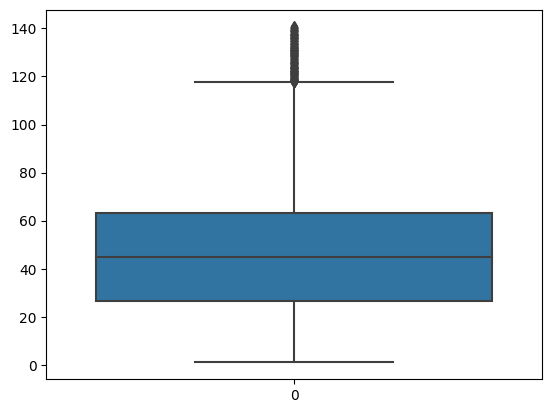

In [ ]:
sns.boxplot(new_dataset['PM2.5'])

In [ ]:
Q1 = new_dataset['PM10'].quantile(0.25)
Q3 = new_dataset['PM10'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
median_value = new_dataset["PM10"].median()
new_dataset.loc[(new_dataset["PM10"] > upper) | (new_dataset['PM10'] < lower), "PM10"] = median_value

<Axes: >

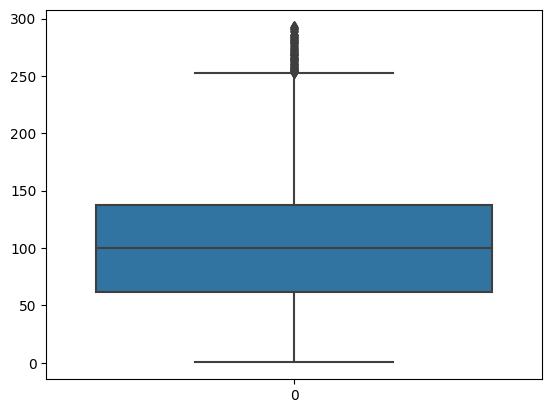

In [ ]:
sns.boxplot(new_dataset['PM10'])

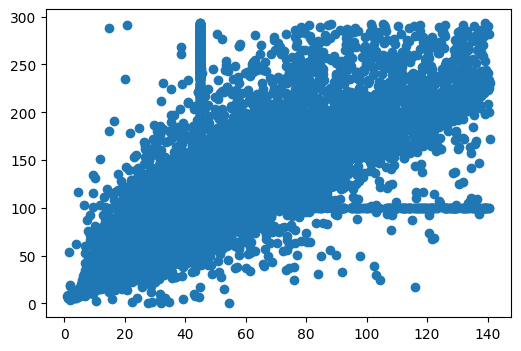

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(new_dataset['PM2.5'],new_dataset['PM10'])

In [ ]:
Q1 = new_dataset['NO2'].quantile(0.25)
Q3 = new_dataset['NO2'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
median_value = new_dataset["NO2"].median()
new_dataset.loc[(new_dataset["NO2"] > upper) | (new_dataset['NO2'] < lower), "NO2"] = median_value

<Axes: >

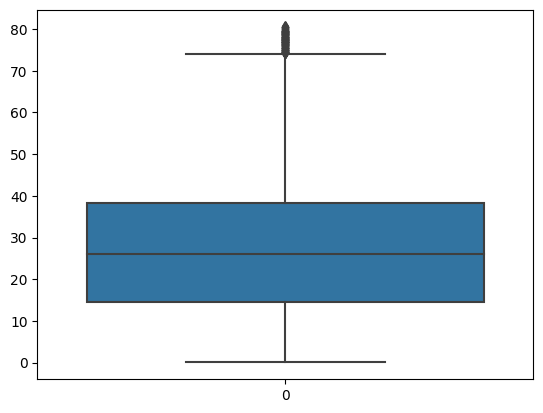

In [ ]:
sns.boxplot(new_dataset['NO2'])

In [ ]:
Q1 = new_dataset['CO'].quantile(0.25)
Q3 = new_dataset['CO'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
median_value = new_dataset["CO"].median()
new_dataset.loc[(new_dataset["CO"] > upper) | (new_dataset['CO'] < lower), "CO"] = median_value

<Axes: >

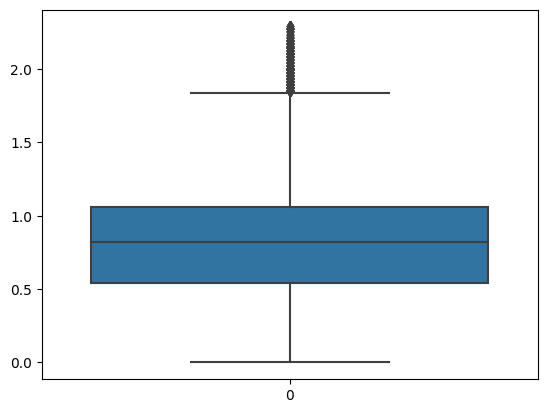

In [ ]:
sns.boxplot(new_dataset['CO'])

In [ ]:
Q1 = new_dataset['O3'].quantile(0.25)
Q3 = new_dataset['O3'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
median_value = new_dataset["O3"].median()
new_dataset.loc[(new_dataset["O3"] > upper) | (new_dataset['O3'] < lower), "O3"] = median_value

<Axes: >

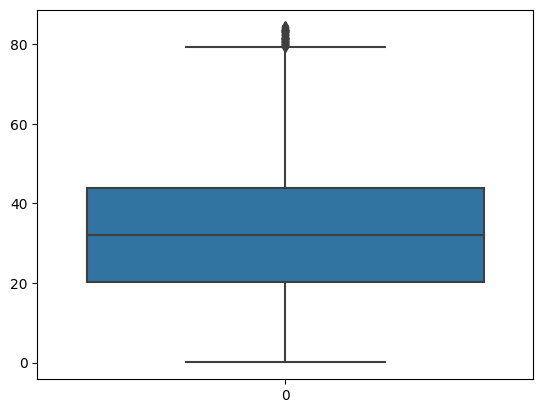

In [ ]:
sns.boxplot(new_dataset['O3'])

In [ ]:
Q1 = new_dataset['Benzene'].quantile(0.25)
Q3 = new_dataset['Benzene'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
median_value = new_dataset["Benzene"].median()
new_dataset.loc[(new_dataset["Benzene"] > upper) | (new_dataset['Benzene'] < lower), "Benzene"] = median_value

<Axes: >

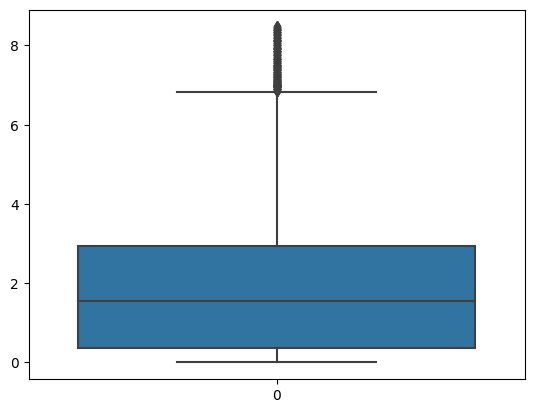

In [ ]:
sns.boxplot(new_dataset['Benzene'])

In [ ]:
Q1 = new_dataset['AQI'].quantile(0.25)
Q3 = new_dataset['AQI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
median_value = new_dataset["AQI"].median()
new_dataset.loc[(new_dataset["AQI"] > upper) | (new_dataset['AQI'] < lower), "AQI"] = median_value

<Axes: >

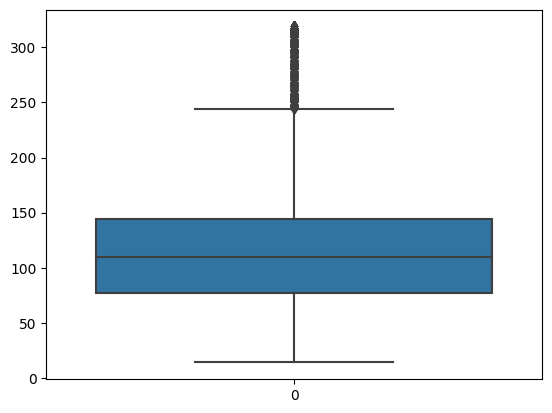

In [ ]:
sns.boxplot(new_dataset['AQI'])

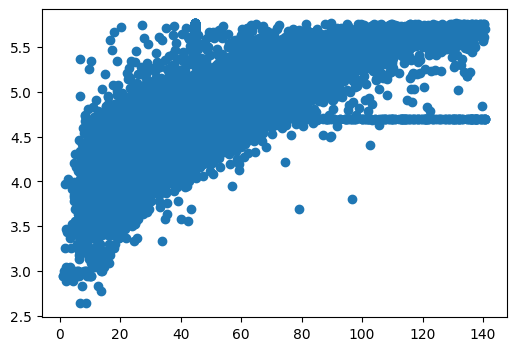

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(new_dataset['PM2.5'],new_dataset['AQI'])

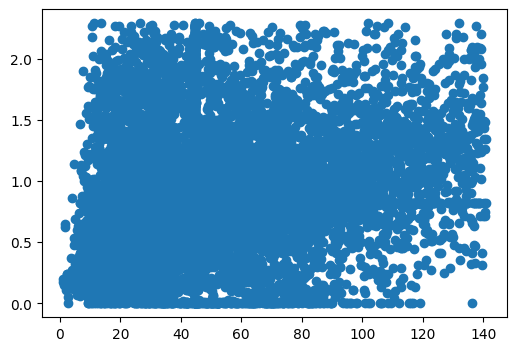

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(new_dataset['PM2.5'],new_dataset['CO'])

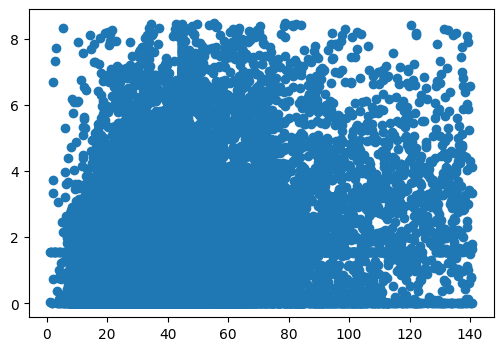

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(new_dataset['PM2.5'],new_dataset['Benzene'])

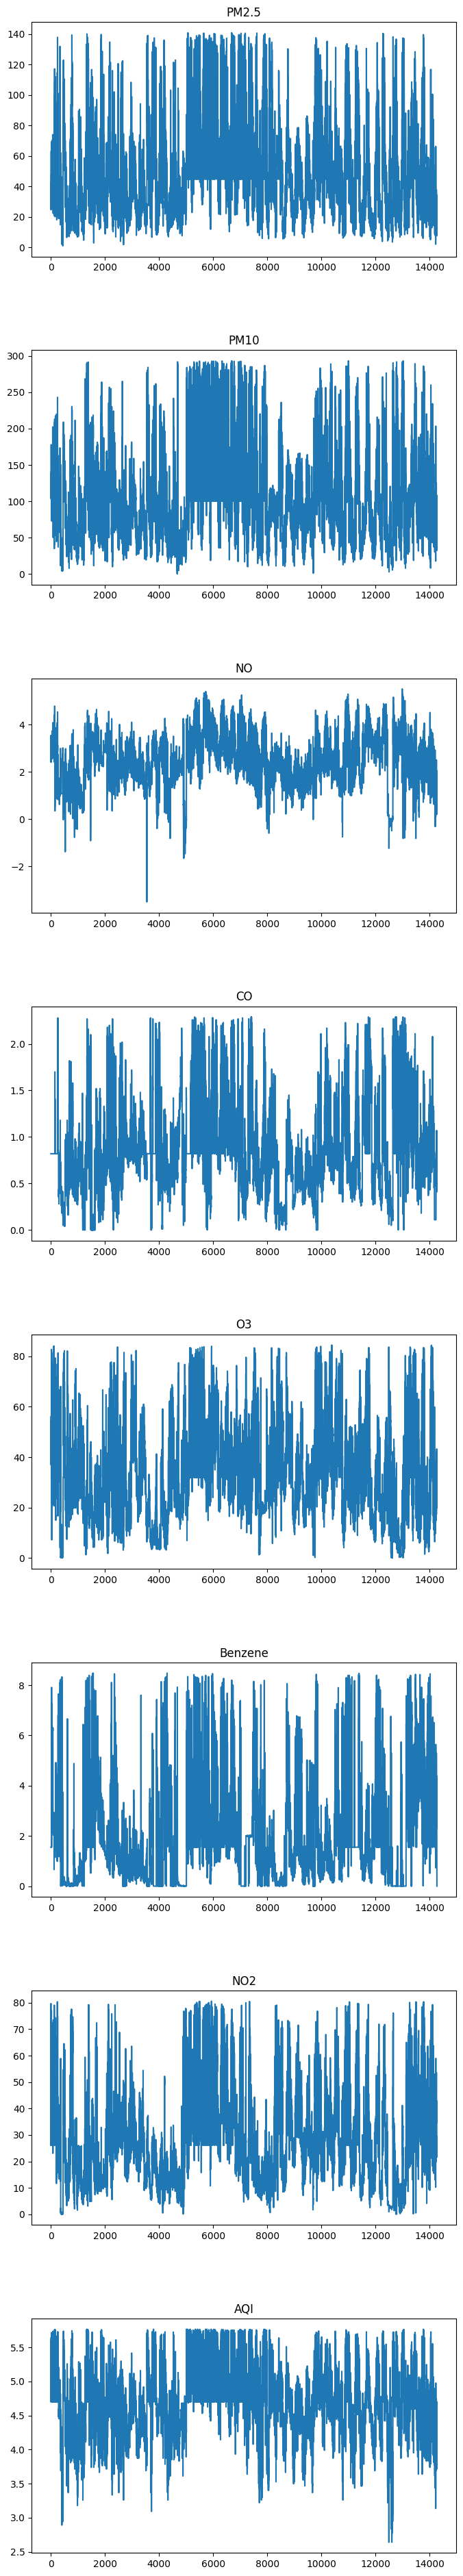

In [ ]:
columns = ["PM2.5", "PM10", "NO", "CO", "O3", "Benzene", "NO2", "AQI"]

# Create subplots for each column
fig, axes = plt.subplots(len(columns), 1, figsize=(8, 6*len(columns)))
plt.subplots_adjust(hspace=0.4)

# Generate line plots for each column
for i, column in enumerate(columns):
    axes[i].set_title(column)
    axes[i].plot(new_dataset[column])

plt.show()

2.2 CORRELATION BETWEEN COLUMNS

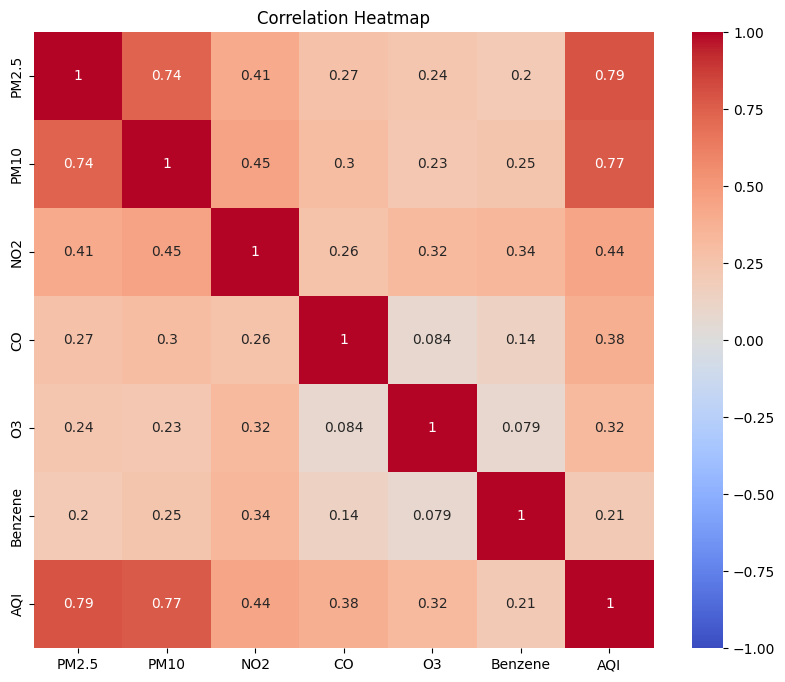

In [ ]:
columns = ["PM2.5", "PM10", "NO2", "CO", "O3", "Benzene", "AQI",]

correlation_matrix = new_dataset[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

3.FEATURE ENGINEERING

In [ ]:
skewness = new_dataset.skew()
skewness

<ipython-input-43-7e08cec88736>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = new_dataset.skew()


PM2.5      0.992462
PM10       0.897144
NO        -0.151488
NO2        0.758464
CO         0.739342
O3         0.496134
Benzene    1.169357
AQI       -0.041531
dtype: float64

In [ ]:
new_dataset['NO'] = np.log(new_dataset['NO'])
#new_dataset['NO'] = np.exp(new_dataset['NO'])

<ipython-input-39-45e707d72f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['NO'] = np.log(new_dataset['NO'])


In [ ]:
new_dataset['AQI'] = np.log(new_dataset['AQI'])

<ipython-input-40-4b519000de73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['AQI'] = np.log(new_dataset['AQI'])


In [ ]:
new_dataset['Benzene'] = np.log(new_dataset['Benzene'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-41-82f8dd6fcad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Benzene'] = np.log(new_dataset['Benzene'])


In [ ]:
new_dataset['Benzene'] = np.exp(new_dataset['Benzene'])

<ipython-input-42-6410f685c72a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Benzene'] = np.exp(new_dataset['Benzene'])


3.1 LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_dataset['City'] = label_encoder.fit_transform(new_dataset['City'])

<ipython-input-44-65bf2bcf1df7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['City'] = label_encoder.fit_transform(new_dataset['City'])


In [ ]:
custom_labels = {
    "Good": 0,
    "Moderate": 1,
    "Satisfactory": 2,
    "Poor":3,
    "Very Poor":4,
    "Severe":5
}
new_dataset['AQI_Bucket'] = new_dataset['AQI_Bucket'].map(custom_labels)

<ipython-input-45-bf0efcb5d630>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['AQI_Bucket'] = new_dataset['AQI_Bucket'].map(custom_labels)


In [ ]:
new_dataset['Benzene'].fillna(new_dataset['Benzene'].median(), inplace=True)

<ipython-input-46-f0dd591cd7aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Benzene'].fillna(new_dataset['Benzene'].median(), inplace=True)


In [ ]:
# from google.colab import files

# new_dataset.to_csv('new_dataset.csv', index=False)
# files.download('new_dataset.csv')

In [ ]:
new_dataset

,City,PM2.5,PM10,NO,NO2,CO,O3,Benzene,AQI,AQI_Bucket
0,0,37.55,122.41,2.713369,26.08,0.82,48.23,1.55,5.638355,3
1,0,33.97,116.32,2.685805,79.71,0.82,51.86,1.55,4.700480,4
2,0,35.48,130.07,2.891482,77.61,0.82,38.99,1.55,4.700480,4
3,0,34.11,138.31,2.585506,75.23,0.82,42.22,1.55,4.700480,4
4,0,33.69,111.73,3.542697,68.90,0.82,36.95,1.55,4.700480,5
...,...,...,...,...,...,...,...,...,...,...
14266,19,7.63,32.27,1.776646,23.27,0.46,19.90,1.45,3.850148,0
14267,19,15.02,50.94,2.038620,25.06,0.47,23.30,2.24,3.713572,0
14268,19,24.38,74.09,1.229641,26.06,0.52,30.14,0.74,4.248495,2
14269,19,22.91,65.73,1.238374,29.53,0.48,30.96,0.01,4.219508,2


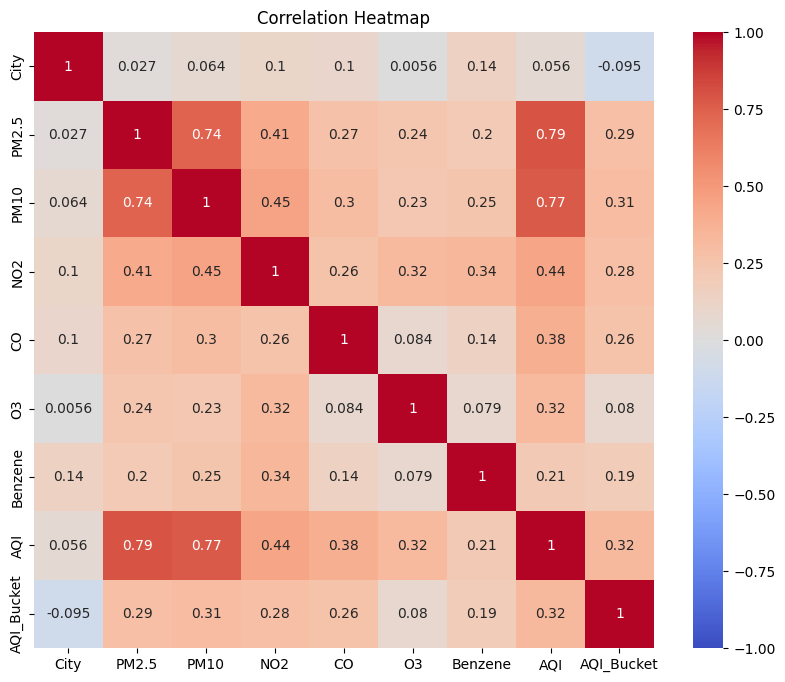

In [ ]:
columns = ["City","PM2.5", "PM10", "NO2", "CO", "O3", "Benzene", "AQI","AQI_Bucket"]

correlation_matrix = new_dataset[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
columns = ["City", "PM2.5", "PM10", "NO2", "CO", "O3", "Benzene", "AQI", "AQI_Bucket"]

# Separate the features (X) and the target variable (y)
X = new_dataset[columns]
y = new_dataset["AQI_Bucket"]

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance = pd.DataFrame({"Feature": columns, "Importance": importances})

# Sort the features by importance in descending order
feature_importance.sort_values("Importance", ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)

# Print the ranked feature list
print(feature_importance)


      Feature  Importance
0  AQI_Bucket    0.457428
1         AQI    0.356155
2        PM10    0.090810
3       PM2.5    0.063091
4          CO    0.013154
5        City    0.007897
6         NO2    0.007133
7          O3    0.002952
8     Benzene    0.001380


4.MACHINE LEARNING MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle


# Assuming 'new_dataset' is your dataset DataFrame
#X = new_dataset.drop(columns=["AQI_Bucket"])  # Features
X = new_dataset[["City", "PM2.5", "PM10", "NO", "CO", "O3", "Benzene", "NO2", "AQI"]]
y = new_dataset["AQI_Bucket"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming X_train, X_test, y_train, and y_test are already defined from the previous split

# Create a Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Training Accuracy  :",round(linear_reg.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(linear_reg.score(X_test,y_test)*100,2),"%")


Mean Squared Error: 0.9877819668443768
R-squared: 0.23599752428594778
Mean Absolute Error: 0.8381076441934981
Root Mean Squared Error: 0.9938722085079031
Training Accuracy  : 24.39 %
Test Accuracy  : 23.6 %


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined from the previous split

# Create a Decision Tree Regressor
tree = DecisionTreeRegressor()

# Fit the model to the training data
tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Training Accuracy  :",round(tree.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(tree.score(X_test,y_test)*100,2),"%")

Mean Squared Error: 0.07460595446584939
R-squared: 0.9422958346799837
Mean Absolute Error: 0.03467600700525394
Root Mean Squared Error: 0.27314090588165185
Training Accuracy  : 100.0 %
Test Accuracy  : 94.23 %


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined from the previous split

# Create a KNN Regressor
knn = KNeighborsRegressor()

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Training Accuracy  :",round(knn.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(knn.score(X_test,y_test)*100,2),"%")

Mean Squared Error: 0.5317968476357269
R-squared: 0.5886803750137354
Mean Absolute Error: 0.4563922942206655
Root Mean Squared Error: 0.729244024751473
Training Accuracy  : 71.31 %
Test Accuracy  : 58.87 %


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined from the previous split

# Create an AdaBoost Regressor
adaboost = AdaBoostRegressor()

# Fit the model to the training data
adaboost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Training Accuracy  :",round(adaboost.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(adaboost.score(X_test,y_test)*100,2),"%")


Mean Squared Error: 0.2557067539063955
R-squared: 0.8022229605330822
Mean Absolute Error: 0.36556393131002707
Root Mean Squared Error: 0.505674553350666
Training Accuracy  : 80.62 %
Test Accuracy  : 80.22 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined from the previous split

# Create a Random Forest Regressor
random_forest = RandomForestRegressor()

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Training Accuracy  :",round(random_forest.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(random_forest.score(X_test,y_test)*100,2),"%")


Mean Squared Error: 0.026628581436077055
R-squared: 0.9794040559305722
Mean Absolute Error: 0.03398949211908931
Root Mean Squared Error: 0.16318266279258056
Training Accuracy  : 99.69 %
Test Accuracy  : 97.94 %


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined from the previous split

# Create an XGBoost Regressor
xgb = XGBRegressor()

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Training Accuracy  :",round(xgb.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(xgb.score(X_test,y_test)*100,2),"%")



Mean Squared Error: 0.025485981527730257
R-squared: 0.9802878027370829
Mean Absolute Error: 0.04764049707330291
Root Mean Squared Error: 0.1596432946532057
Training Accuracy  : 99.72 %
Test Accuracy  : 98.03 %


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, and y_test are already defined from the previous split

# Create a Bayesian Ridge Regression model
bayesian_reg = BayesianRidge()

# Fit the model to the training data
bayesian_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = bayesian_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae= mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Training Accuracy  :",round(bayesian_reg.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(bayesian_reg.score(X_test,y_test)*100,2),"%")


Mean Squared Error: 0.9878766532260974
R-squared: 0.23592428886307193
Mean Absolute Error: 0.8382061537579846
Root Mean Squared Error: 0.9939198424551637
Training Accuracy  : 24.38 %
Test Accuracy  : 23.59 %


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.5], 'gamma': [0, 0.1, 0.2], 'subsample': [0.8, 0.9, 1.0], 'colsample_bytree': [0.8, 0.9, 1.0]}


In [ ]:
xgb = XGBRegressor()

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                                   n_iter=10, scoring='r2', cv=5,
                                   verbose=1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
# Print the best parameters and score
print("Best score: ", random_search.best_score_)
print("Best parameters found: ", random_search.best_params_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Error: ", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Best score:  0.9761131205273907
Best parameters found:  {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
RMSE Error:  0.15457357687068715
R2 Score: 0.9815199055720667


In [ ]:
print("Training Accuracy  :",round(random_search.score(X_train,y_train)*100,2),"%")
print("Test Accuracy  :",round(random_search.score(X_test,y_test)*100,2),"%")

Training Accuracy  : 99.65 %
Test Accuracy  : 98.15 %


DEPLOYMENT

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb,open('/content/airquality','wb'))

In [ ]:
xgb_loaded=pickle.load(open('/content/airquality','rb'))

In [ ]:
xgb_loaded.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb_loaded.predict(X_test)

array([2.0004427 , 0.9993014 , 1.0120986 , ..., 2.992933  , 1.9997771 ,
       0.99077475], dtype=float32)